In [1]:
import yfinance as yf
import pandas as pd
import os


In [2]:
if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")


In [3]:
sp500.index = pd.to_datetime(sp500.index)

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,2209800080,0,0
2022-09-07,3909.429932,3987.889893,3906.030029,3979.870117,0,0,0
2022-09-08,3959.939941,4010.500000,3944.810059,4006.179932,0,0,0


<Axes: xlabel='Date'>

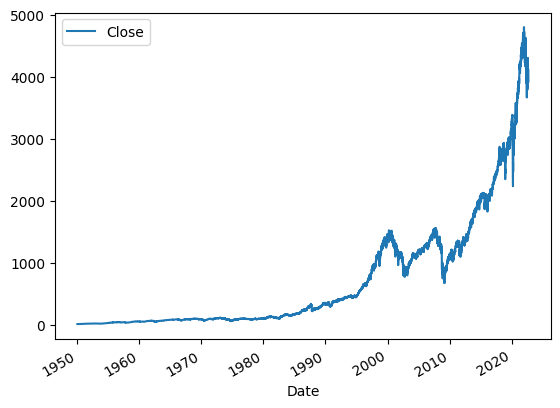

In [5]:
sp500.plot.line(y="Close", use_index=True)

In [6]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [7]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [8]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001
...,...,...,...,...,...,...
2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,2209800080,3979.870117
2022-09-07,3909.429932,3987.889893,3906.030029,3979.870117,0,4006.179932
2022-09-08,3959.939941,4010.500000,3944.810059,4006.179932,0,4067.360107


In [9]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [10]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000,1
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000,1
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000,1
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000,1
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001,0
...,...,...,...,...,...,...,...
2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,2209800080,3979.870117,1
2022-09-07,3909.429932,3987.889893,3906.030029,3979.870117,0,4006.179932,1
2022-09-08,3959.939941,4010.500000,3944.810059,4006.179932,0,4067.360107,1


In [11]:
sp500 = sp500.loc["1990-01-01":].copy()

In [12]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,2209800080,3979.870117,1
2022-09-07,3909.429932,3987.889893,3906.030029,3979.870117,0,4006.179932,1
2022-09-08,3959.939941,4010.500000,3944.810059,4006.179932,0,4067.360107,1


In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [14]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.47058823529411764

<Axes: xlabel='Date'>

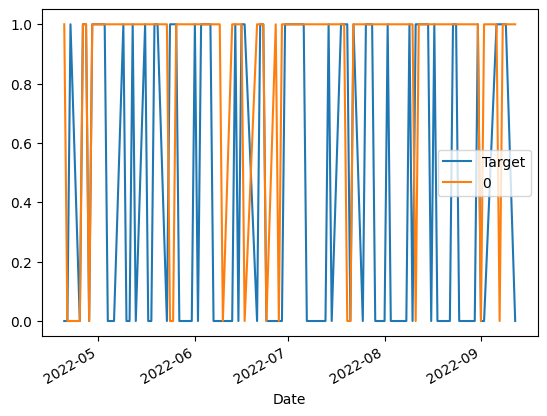

In [15]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [16]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [17]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [18]:
predictions = backtest(sp500, model, predictors)

In [19]:
predictions["Predictions"].value_counts()

,count
Predictions,
0,3337
1,2401


In [20]:
precision_score(predictions["Target"], predictions["Predictions"])

0.534777176176593

In [21]:
predictions["Target"].value_counts() / predictions.shape[0]

,count
Target,
1,0.536075
0,0.463925


In [22]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors+= [ratio_column, trend_column]

In [23]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

In [24]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,2209800080,3979.870117,1,0.997948,0.0,0.989893,1.0,0.982136,26.0,0.902791,120.0,1.103594,542.0
2022-09-07,3909.429932,3987.889893,3906.030029,3979.870117,0,4006.179932,1,1.009087,1.0,1.008370,2.0,0.999819,27.0,0.919786,121.0,1.123489,543.0
2022-09-08,3959.939941,4010.500000,3944.810059,4006.179932,0,4067.360107,1,1.003294,2.0,1.012411,3.0,1.005349,28.0,0.926253,122.0,1.130564,543.0


In [25]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [26]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [27]:
predictions = backtest(sp500, model, new_predictors)

In [28]:
predictions["Predictions"].value_counts()

,count
Predictions,
0.0,3934
1.0,804


In [29]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5696517412935324

In [30]:
predictions["Target"].value_counts() / predictions.shape[0]

,count
Target,
1,0.546855
0,0.453145


In [31]:
predictions

,Target,Predictions
Date,,
2003-11-14,0,0.0
2003-11-17,0,1.0
2003-11-18,1,1.0
2003-11-19,0,0.0
2003-11-20,1,1.0
...,...,...
2022-09-06,1,0.0
2022-09-07,1,0.0
2022-09-08,1,0.0


--- Baseline Model Analysis ---

Classification Report:
              precision    recall  f1-score   support

        Down       0.46      0.84      0.59      2147
          Up       0.57      0.18      0.27      2591

    accuracy                           0.48      4738
   macro avg       0.51      0.51      0.43      4738
weighted avg       0.52      0.48      0.42      4738


Generating Confusion Matrix...


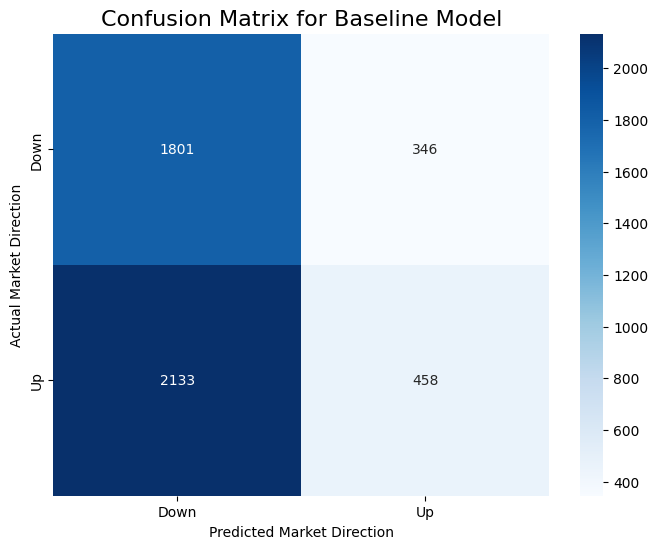

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# --- Deeper Analysis ---
print("--- Baseline Model Analysis ---")

# Print a detailed classification report
# This shows precision, recall, and f1-score for both "Up" and "Down" predictions
print("\nClassification Report:")
print(classification_report(predictions['Target'], predictions['Predictions'], target_names=['Down', 'Up']))

# Generate and plot the Confusion Matrix
print("\nGenerating Confusion Matrix...")
cm = confusion_matrix(predictions['Target'], predictions['Predictions'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title('Confusion Matrix for Baseline Model', fontsize=16)
plt.ylabel('Actual Market Direction')
plt.xlabel('Predicted Market Direction')
plt.show()


--- Advanced Model Analysis ---
New Precision Score: 0.5630

New Classification Report:
              precision    recall  f1-score   support

        Down       0.46      0.86      0.60      2141
          Up       0.56      0.15      0.24      2584

    accuracy                           0.47      4725
   macro avg       0.51      0.50      0.42      4725
weighted avg       0.51      0.47      0.40      4725



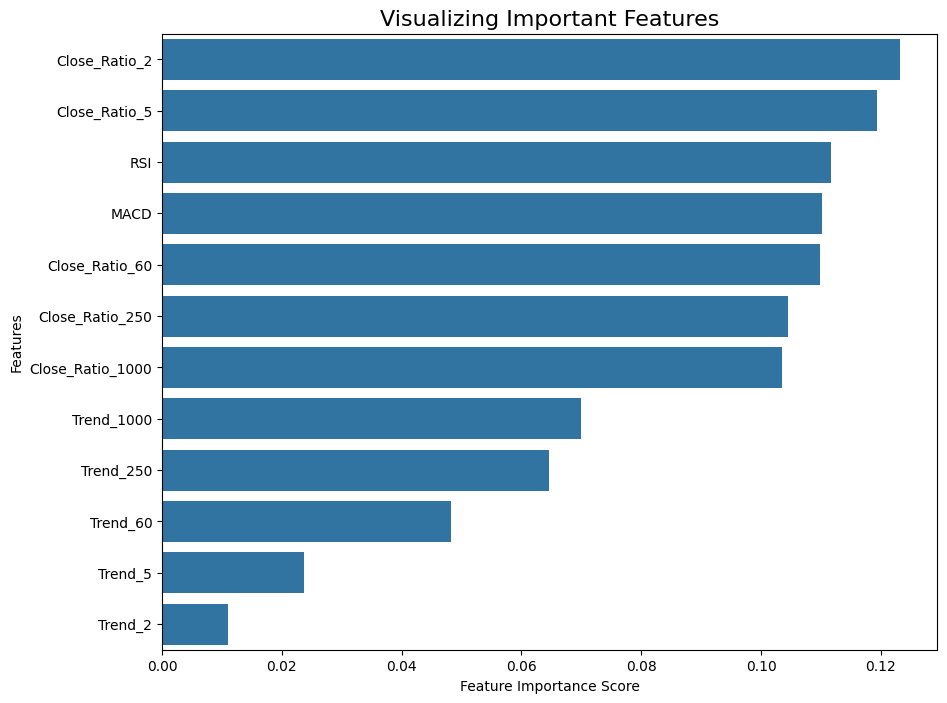

In [34]:
# --- Re-run Backtest with Advanced Features ---

# Re-initialize the model
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

# Run the backtest again with the *advanced* predictors
advanced_predictions = backtest(sp500, model, advanced_predictors)

print("\n--- Advanced Model Analysis ---")
print(f"New Precision Score: {precision_score(advanced_predictions['Target'], advanced_predictions['Predictions']):.4f}")
print("\nNew Classification Report:")
print(classification_report(advanced_predictions['Target'], advanced_predictions['Predictions'], target_names=['Down', 'Up']))


# --- Feature Importance ---

# The model is retrained in each step of the backtest.
# To get a good idea of feature importance, we can train one final model on the last training set.
last_train_set = sp500.iloc[:(sp500.shape[0] - 250)] # Example: use all but the last 'step' as the final training data
model.fit(last_train_set[advanced_predictors], last_train_set["Target"])

# Get feature importances
importances = model.feature_importances_
feature_imp = pd.Series(importances, index=advanced_predictors).sort_values(ascending=False)

# Plotting Feature Importance
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features", fontsize=16)
plt.show()

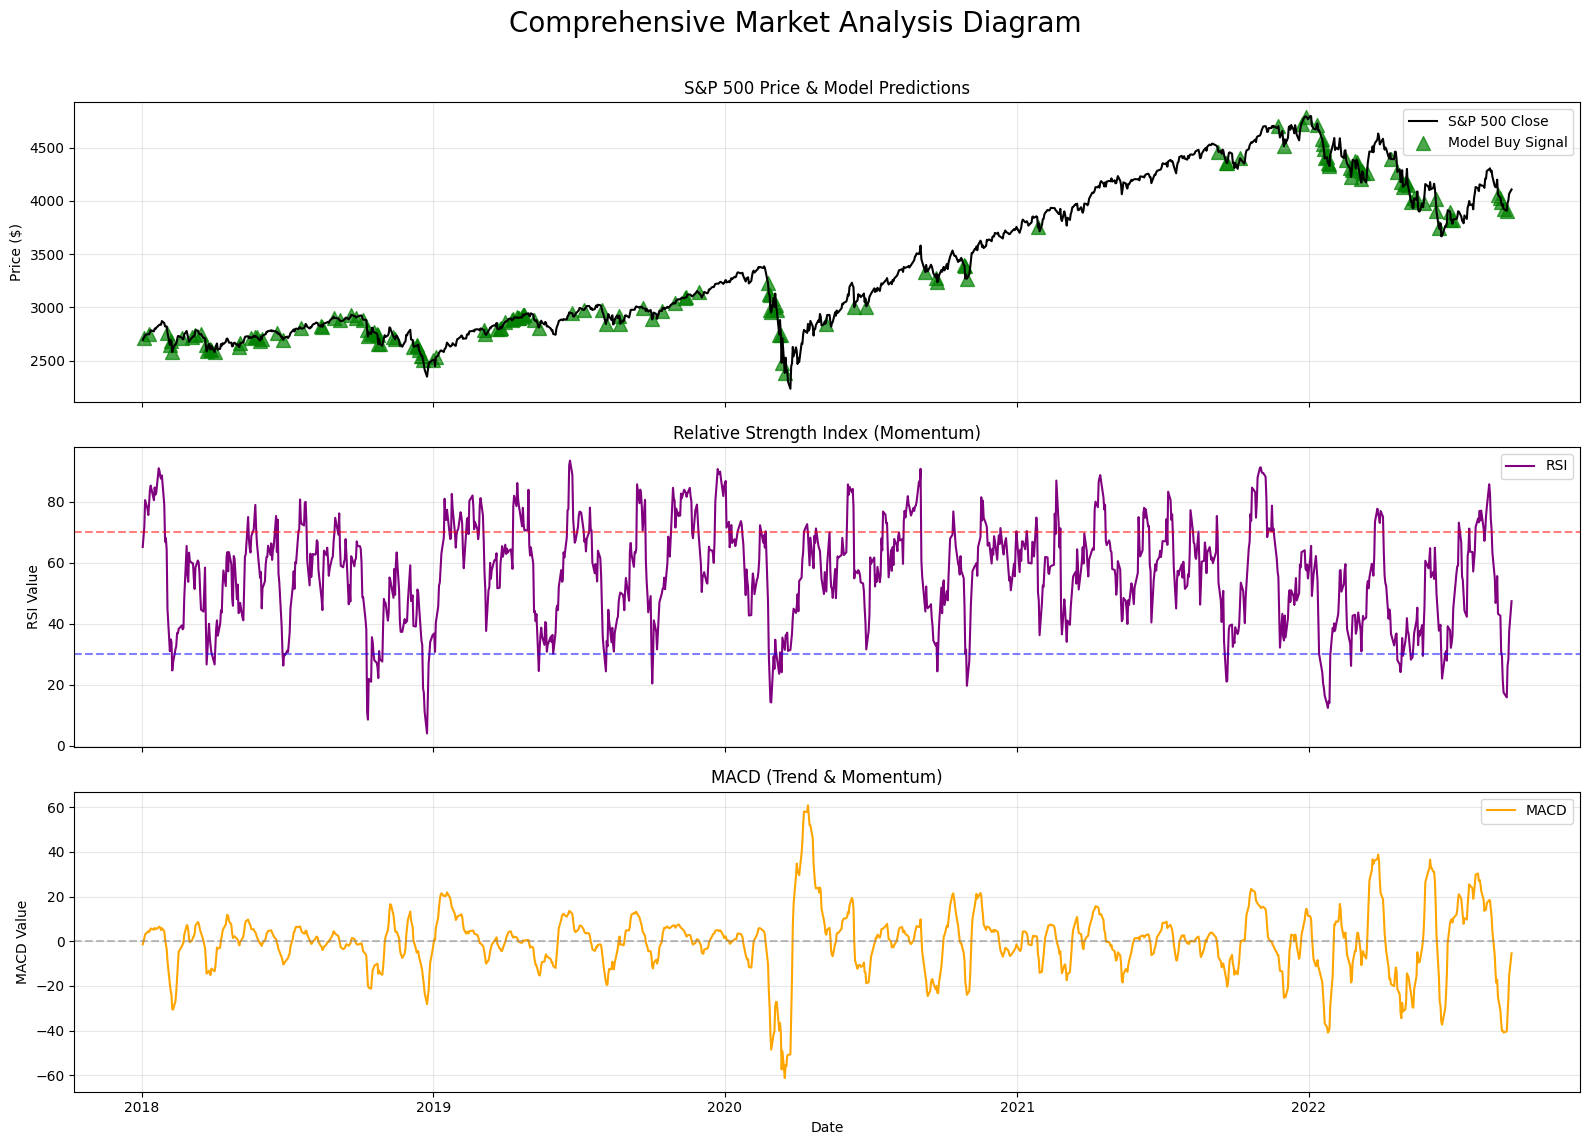

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# This assumes you have already run the previous code blocks and have the
# 'sp500' dataframe with RSI and MACD columns, and the 'advanced_predictions' dataframe.

# Let's focus on a more recent time period for clarity, e.g., from 2018 onwards
analysis_df = sp500['2018-01-01':].copy()
predictions_subset = advanced_predictions.loc[analysis_df.index]

# Get the specific dates where the model predicted 'Up' (1)
buy_signals = predictions_subset[predictions_subset['Predictions'] == 1].index

# Create the multi-panel plot
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 12), sharex=True)
fig.suptitle('Comprehensive Market Analysis Diagram', fontsize=20)

# --- Panel 1: S&P 500 Close Price with Buy Signals ---
ax1.plot(analysis_df.index, analysis_df['Close'], label='S&P 500 Close', color='black')
ax1.scatter(buy_signals, analysis_df.loc[buy_signals]['Close'], marker='^', color='green', s=100, label='Model Buy Signal', alpha=0.7)
ax1.set_ylabel('Price ($)')
ax1.set_title('S&P 500 Price & Model Predictions')
ax1.legend()
ax1.grid(True, alpha=0.3)

# --- Panel 2: Relative Strength Index (RSI) ---
ax2.plot(analysis_df.index, analysis_df['RSI'], label='RSI', color='purple')
ax2.axhline(70, linestyle='--', color='red', alpha=0.5) # Overbought line
ax2.axhline(30, linestyle='--', color='blue', alpha=0.5) # Oversold line
ax2.set_ylabel('RSI Value')
ax2.set_title('Relative Strength Index (Momentum)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# --- Panel 3: Moving Average Convergence Divergence (MACD) ---
ax3.plot(analysis_df.index, analysis_df['MACD'], label='MACD', color='orange')
ax3.axhline(0, linestyle='--', color='grey', alpha=0.5) # Centerline
ax3.set_ylabel('MACD Value')
ax3.set_title('MACD (Trend & Momentum)')
ax3.set_xlabel('Date')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Improve layout and show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Adjust for suptitle
plt.show()

/tmp/ipython-input-1605412532.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500['Market_Returns'] = sp500['Close'].pct_change()
/tmp/ipython-input-1605412532.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500['Strategy_Returns'] = sp500['Market_Returns'] * advanced_predictions['Predictions'].shift(1)
/tmp/ipython-input-1605412532.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

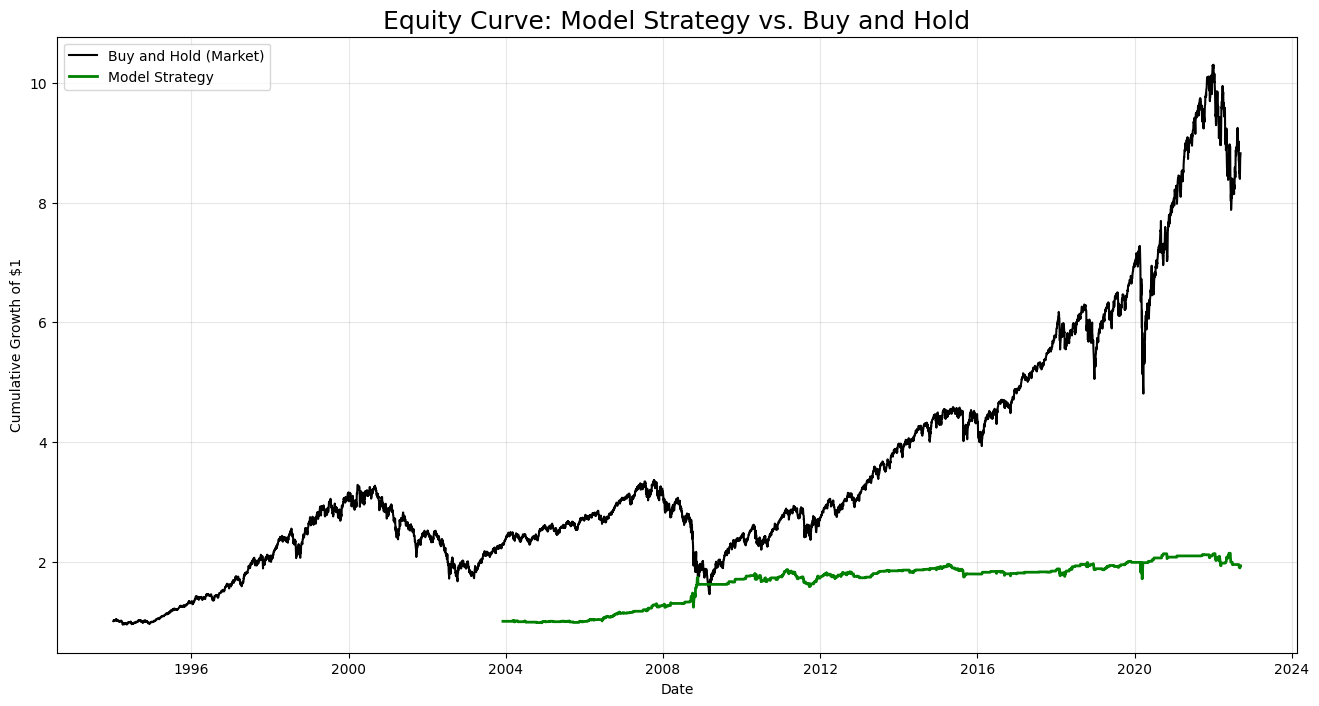

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# This assumes you have already run the previous code blocks and have the
# 'sp500' dataframe and the 'advanced_predictions' dataframe.

# --- Strategy Performance Analysis ---

# 1. Calculate daily market returns for the "Buy and Hold" strategy
sp500['Market_Returns'] = sp500['Close'].pct_change()

# 2. Calculate the returns for our model's strategy
# We shift the predictions by 1 day, because a prediction made on day 't' is for the market movement on day 't+1'.
sp500['Strategy_Returns'] = sp500['Market_Returns'] * advanced_predictions['Predictions'].shift(1)

# 3. Calculate cumulative returns for both strategies
# We use cumprod() to see how an initial investment would grow over time.
sp500['Cumulative_Market_Returns'] = (1 + sp500['Market_Returns']).cumprod()
sp500['Cumulative_Strategy_Returns'] = (1 + sp500['Strategy_Returns']).cumprod()


# --- Plotting the Equity Curves ---

plt.figure(figsize=(16, 8))
plt.plot(sp500.index, sp500['Cumulative_Market_Returns'], label='Buy and Hold (Market)', color='black')
plt.plot(sp500.index, sp500['Cumulative_Strategy_Returns'], label='Model Strategy', color='green', linewidth=2)

plt.title('Equity Curve: Model Strategy vs. Buy and Hold', fontsize=18)
plt.ylabel('Cumulative Growth of $1')
plt.xlabel('Date')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()